In [1]:
! pip install librosa soundfile numpy sklearn pyaudio


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import librosa
import soundfile
import glob
import os
import pickle

In [3]:
import numpy as np

In [4]:
def feature_extraction(file_name, power_spec,pitch, freq):
    with soundfile.SoundFile(file_name) as sound:
        a=sound.read(dtype='float32')
        rate=sound.samplerate
        if pitch:
            fourier_tran=np.abs(librosa.stft(a))
        results=np.array([])
        if power_spec:
            power=np.mean(librosa.feature.mfcc(y=a,sr=rate, n_mfcc=40).T, axis=0)
            results=np.hstack((results,power))
        if pitch:
            pitch=np.mean(librosa.feature.chroma_stft(S=fourier_tran,sr=rate).T,axis=0)
            results=np.hstack((results,pitch))
        if freq:
            freq=np.mean(librosa.feature.melspectrogram(a,sr=rate).T, axis=0)
            results=np.hstack((results,freq))
    return results


In [5]:
actual_emotions={   
    '01':'neutral',   
    '02':'calm',   
    '03':'happy',   
    '04':'sad',   
    '05':'angry',   
    '06':'fearful',   
    '07':'disgust',   
    '08':'surprised' } 
    #DataFlair - Emotions to observe 
emotions_to_observe=['fearful','neutral','calm', 'happy', 'angry', 'disgust','sad','surprised']

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
def data_load(test_ratio=0.25):
    fea,e=[],[]
    for f in glob.glob(".\\ravdess-data\\Actor_*\\*.wav"):
        file_name=os.path.basename(f)
        #print(f)
        emotion=actual_emotions[file_name.split("-")[2]]
        #print(emotion)
        if emotion not in emotions_to_observe:
            continue
        feature=feature_extraction(f,power_spec=True, pitch=True, freq=True)
        fea.append(feature)
        e.append(emotion)
    return train_test_split(np.array(fea),e, test_size=test_ratio,random_state=6)

In [8]:
x_train,x_test,y_train,y_test=data_load(test_ratio=0.2)

C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_13800/1761490649.py:15: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  freq=np.mean(librosa.feature.melspectrogram(a,sr=rate).T, axis=0)
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_13800/1761490649.py:15: FutureWarning: Pass y=[ 3.0517578e-05  3.0517578e-05  3.0517578e-05 ...  0.0000000e+00
  0.0000000e+00 -3.0517578e-05] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  freq=np.mean(librosa.feature.melspectrogram(a,sr=rate).T, axis=0)
C:\Users\ADITYA~1\AppData\Local\Temp/ipykernel_13800/1761490649.py:15: FutureWarning: Pass y=[3.0517578e-05 3.0517578e-05 0.0000000e+00 ... 0.0000000e+00 0.0000000e+00
 0.0000000e+00] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  freq=np.mean(librosa.feature.melspectrogram(a,sr=rate).T, axis=0)
C:\Users\ADITY

In [9]:
x_test.shape[0]

288

In [10]:
x_train.shape[0]

1152

In [31]:
from sklearn.neural_network import MLPClassifier
# Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.1, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(350,), learning_rate='adaptive', max_iter=500)

In [32]:
model.fit(x_train,y_train)

MLPClassifier(alpha=0.1, batch_size=256, hidden_layer_sizes=(350,),
              learning_rate='adaptive', max_iter=500)

In [33]:
y_pred=model.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.4861111111111111

In [35]:
import tensorflow 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [36]:
model=Sequential()
###first layer
model.add(Dense(3000,input_shape=(180,)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###second layer
model.add(Dense(1500))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###third layer
model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###fourth layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.1))
###final layer
model.add(Dense(8))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3000)              543000    
                                                                 
 activation (Activation)     (None, 3000)              0         
                                                                 
 dropout (Dropout)           (None, 3000)              0         
                                                                 
 dense_1 (Dense)             (None, 1500)              4501500   
                                                                 
 activation_1 (Activation)   (None, 1500)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1500)              0         
                                                                 
 dense_2 (Dense)             (None, 800)               1

In [38]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y2=to_categorical(labelencoder.fit_transform(y_train))
y3=to_categorical(labelencoder.fit_transform(y_test))

In [41]:
model_history=model.fit(x_train, y2, steps_per_epoch=100,batch_size=50, epochs=200, validation_data=(x_test, y3), verbose=1)

Epoch 1/200
100/100 [==============================] - 7s 66ms/step - loss: 0.1131 - accuracy: 0.9626 - val_loss: 2.7717 - val_accuracy: 0.6562
Epoch 2/200
100/100 [==============================] - 6s 63ms/step - loss: 0.0672 - accuracy: 0.9775 - val_loss: 2.6780 - val_accuracy: 0.6458
Epoch 3/200
100/100 [==============================] - 6s 64ms/step - loss: 0.2202 - accuracy: 0.9314 - val_loss: 2.2147 - val_accuracy: 0.6285
Epoch 4/200
100/100 [==============================] - 6s 64ms/step - loss: 0.2021 - accuracy: 0.9372 - val_loss: 2.5106 - val_accuracy: 0.5486
Epoch 5/200
100/100 [==============================] - 6s 61ms/step - loss: 0.2560 - accuracy: 0.9166 - val_loss: 2.2378 - val_accuracy: 0.6597
Epoch 6/200
100/100 [==============================] - 7s 66ms/step - loss: 0.3870 - accuracy: 0.8794 - val_loss: 2.4007 - val_accuracy: 0.5938
Epoch 7/200
100/100 [==============================] - 6s 58ms/step - loss: 0.1875 - accuracy: 0.9376 - val_loss: 2.5147 - val_accuracy:

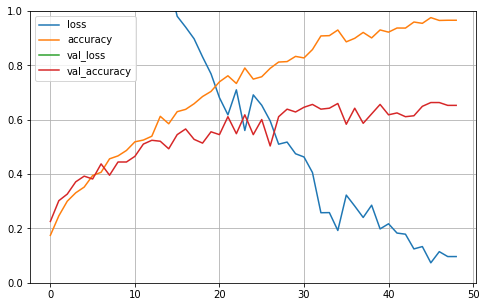

In [40]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

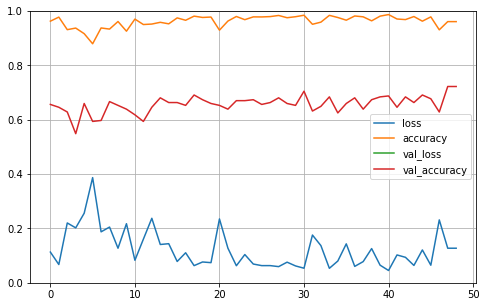

In [42]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()